In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("car data (1).csv")

# Display basic info about the dataset
print(df.info())

# Show first 5 rows
print(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        52

In [4]:
# Check for missing values
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
print(df.dtypes)


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [8]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# View updated dataset
print(df_encoded.head())


   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 150 street  ...  Car_Name_swif

In [10]:
df_encoded['Car_Age'] = 2025 - df_encoded['Year']
df_encoded.drop('Year', axis=1, inplace=True)


In [12]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']


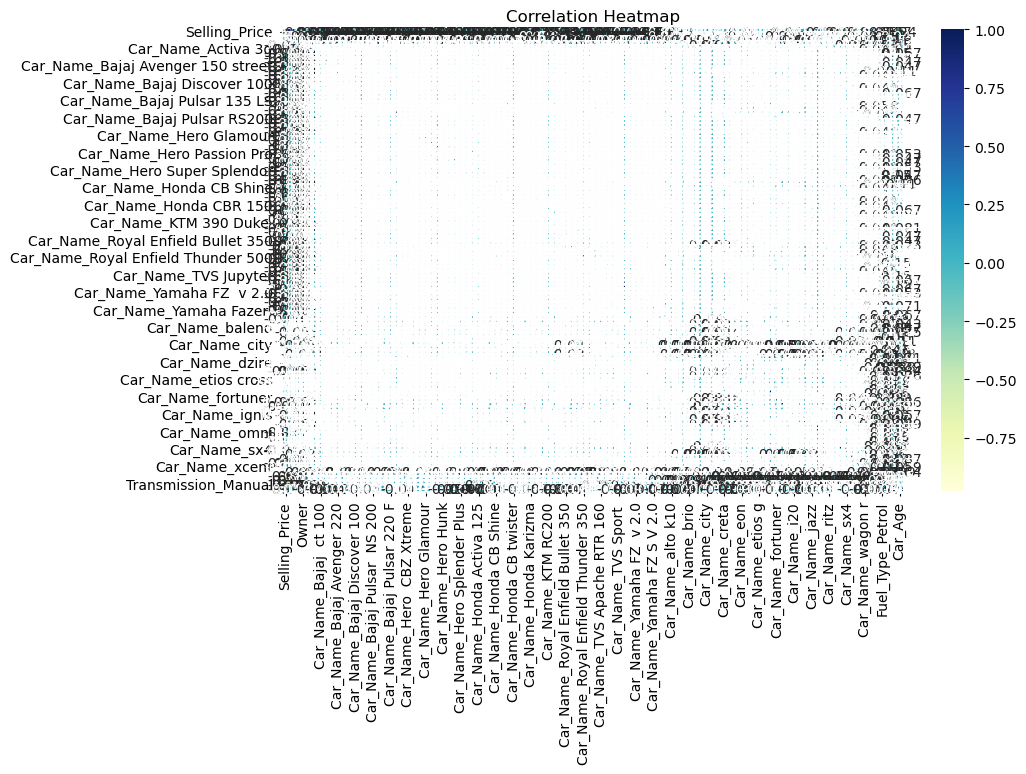

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap with a new color map
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
print(df_encoded.columns)


Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       'Car_Name_Bajaj Avenger 220',
       ...
       'Car_Name_sx4', 'Car_Name_verna', 'Car_Name_vitara brezza',
       'Car_Name_wagon r', 'Car_Name_xcent', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual',
       'Car_Age'],
      dtype='object', length=106)


In [30]:
print(df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [32]:
# Example: if the column is 'Year'
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [34]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Confirm the sizes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (240, 105)
Testing data shape: (61, 105)


In [42]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.9 MB/s eta 0:00:00a 0:00:01


In [44]:
from xgboost import XGBRegressor


In [56]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# ----- STEP 1: Separate features and target -----
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# ----- STEP 2: Scale the features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- STEP 3: Select top 5 features -----
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# ----- STEP 4: Split into train and test sets -----
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# ----- STEP 5: Initialize models -----
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# ----- STEP 6: Train models -----
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# ----- STEP 7: Predict on test data -----
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# ----- STEP 8: Evaluation Function -----
def evaluate_model(y_true, y_pred, name):
    print(f"📊 {name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE     : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("-" * 40)

# ----- STEP 9: Evaluate all models -----
evaluate_model(y_test, y_pred_lr, "Linear Regression (Top 3 Features)")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")


📊 Linear Regression (Top 3 Features)
R² Score: 0.7295
MAE     : 1.57
RMSE    : 2.50
----------------------------------------
📊 Random Forest Regressor
R² Score: 0.7926
MAE     : 1.30
RMSE    : 2.19
----------------------------------------
📊 XGBoost Regressor
R² Score: 0.7704
MAE     : 1.30
RMSE    : 2.30
----------------------------------------


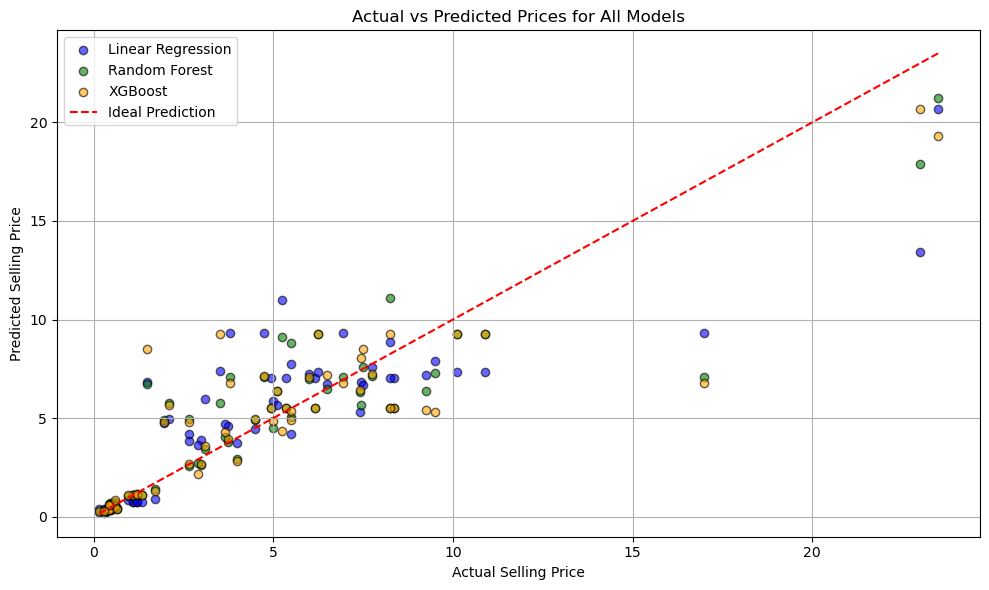

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plots for each model
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6, color='blue', edgecolor='k')
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6, color='green', edgecolor='k')
plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.6, color='orange', edgecolor='k')

# Ideal prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Prediction")

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
